## EDA

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
from pathlib import Path
from PIL import Image
from dask import bag, diagnostics
from dask.diagnostics import ProgressBar

There is no csv file in this dataset. Let's discover which fonts do we have

In [3]:
dir_path ='../data/raw/Font Dataset Large'

files_dir = [
    f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))
]
print(files_dir)

['Calibry', 'Steppes TT', 'Fascinate', 'Arial', 'Mrs Eaves', 'Californian FB', 'News Gothic', 'Book Antiqua', 'Akzidenz Grotesk', 'Georgia', 'LCD Mono', 'Gill sans', 'Courier', 'Monotype Corsiva', 'Helvetica', 'Calvin', 'Rockwell', 'Garamond', 'Century', 'Candara', 'Franklin Gothic', 'Minion', 'Sabon', 'Calligraphy', 'Cambria', 'Didot', 'Bodoni', 'Verdana', 'Elephant', 'Futura', 'Snowdrift Regular', 'Frutiger', 'Myriad', 'Perpetua', 'Baskerville', 'Bell MT', 'Agency', 'Comic Sans MS', 'Nasalization', 'Palatino linotype', 'Brandish', 'Lucida Bright', 'Corbel', 'Times New Roman', 'Consolas', 'Hombre', 'Bembo', 'Algerian']


In [4]:
print(f'Number of fonts: {len(files_dir)}')

Number of fonts: 48


In [5]:
p = Path(dir_path) 
f = p.rglob('*')
paths, counts = np.unique([x.parent for x in f], return_counts=True)
path_names = []
for path_name in paths:
    path_names.append(path_name.name)
path_counts = list(zip(paths, counts))
path_counts = path_counts[1:]
path_counts

[(PosixPath('../data/raw/Font Dataset Large/Agency'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Akzidenz Grotesk'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Algerian'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Arial'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Baskerville'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Bell MT'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Bembo'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Bodoni'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Book Antiqua'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Brandish'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Calibry'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Californian FB'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Calligraphy'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Calvin'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Cambria'), 5000),
 (PosixPath('../data/raw/Font Dataset Large/Ca

As we can see we have 48 fonts with 5000 images per font

Text(0, 0.5, '# Images')

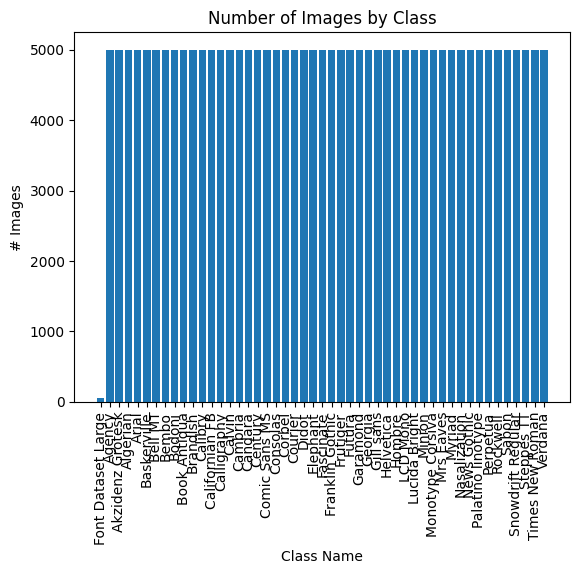

In [6]:
plt.bar(path_names, counts)
plt.xticks(rotation=90)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('# Images')


### Plotting Image Size
Here we will create a loop that will iterate through folders and return dimensions of each image, which will be added to a DataFrame for plotting.

In [7]:
def get_dimensions(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    
    return h,w

../data/raw/Font Dataset Large/Rockwell
[########################################] | 100% Completed | 2.59 ss
../data/raw/Font Dataset Large/Sabon
[########################################] | 100% Completed | 3.25 ss
../data/raw/Font Dataset Large/Snowdrift Regular
[########################################] | 100% Completed | 3.32 ss
../data/raw/Font Dataset Large/Steppes TT
[########################################] | 100% Completed | 3.38 ss
../data/raw/Font Dataset Large/Times New Roman
[########################################] | 100% Completed | 2.63 ss
../data/raw/Font Dataset Large/Verdana
[########################################] | 100% Completed | 2.49 ss


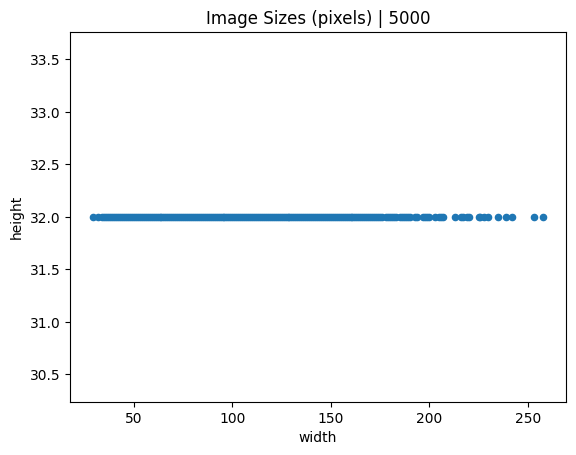

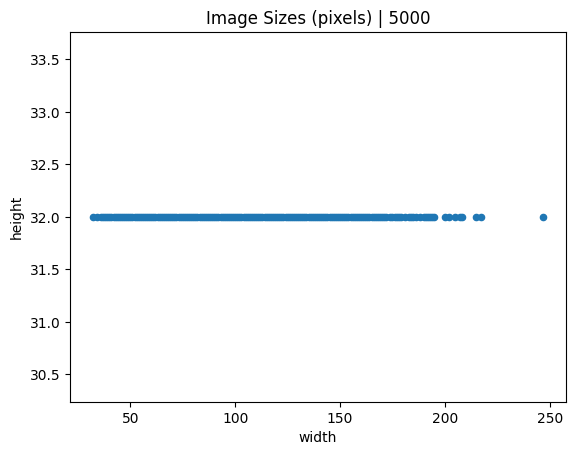

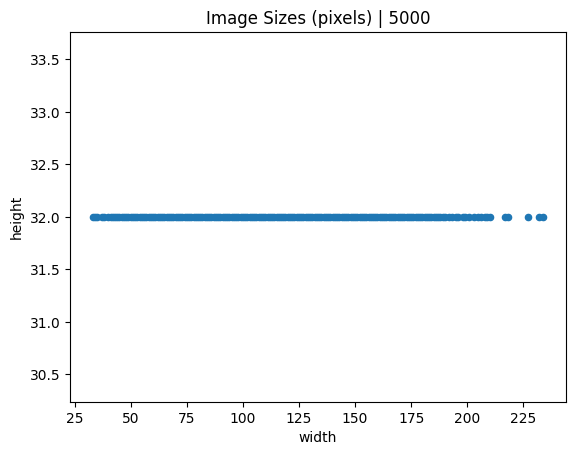

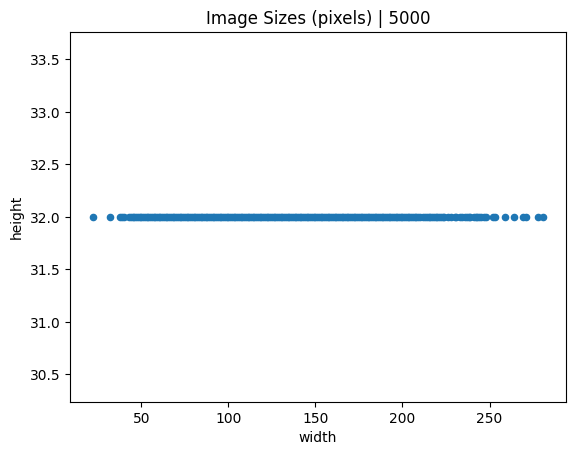

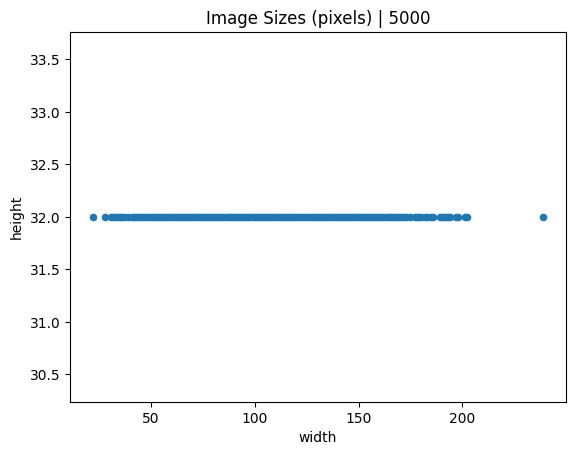

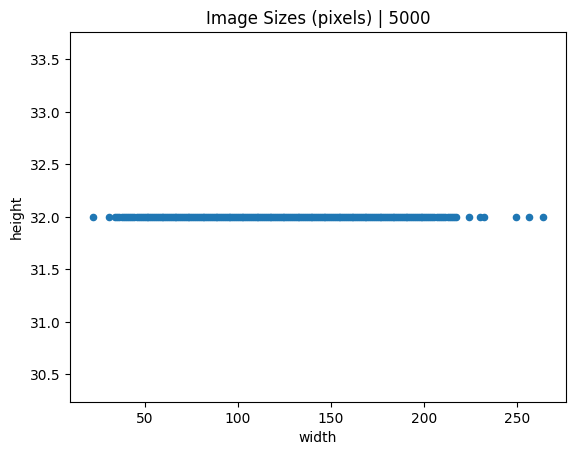

In [9]:
%matplotlib inline

for path, count in path_counts[-6:]:
    print(path)
    p = Path(path).glob('**/*')
    filelist = [x for x in p if x.is_file()]
    
    dimensions = bag.from_sequence(filelist).map(get_dimensions)
    with diagnostics.ProgressBar():
        dimensions = dimensions.compute()
    dim_df = pd.DataFrame(dimensions, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height')
    plt.title('Image Sizes (pixels) | {}'.format(count))

### Viewing a Sample of Images
Let's take a look to sample of images from each class

In [38]:

def show_image_sample(path, ncols, nrows):
    '''display 4x4 images'''
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    p = Path(path).glob('**/*')
    filelist = [x for x in p if x.is_file()]
    for i, img_path in enumerate(filelist[-16:]):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = Image.open(img_path)
        plt.imshow(img)
    plt.show()

../data/raw/Font Dataset Large/Rockwell


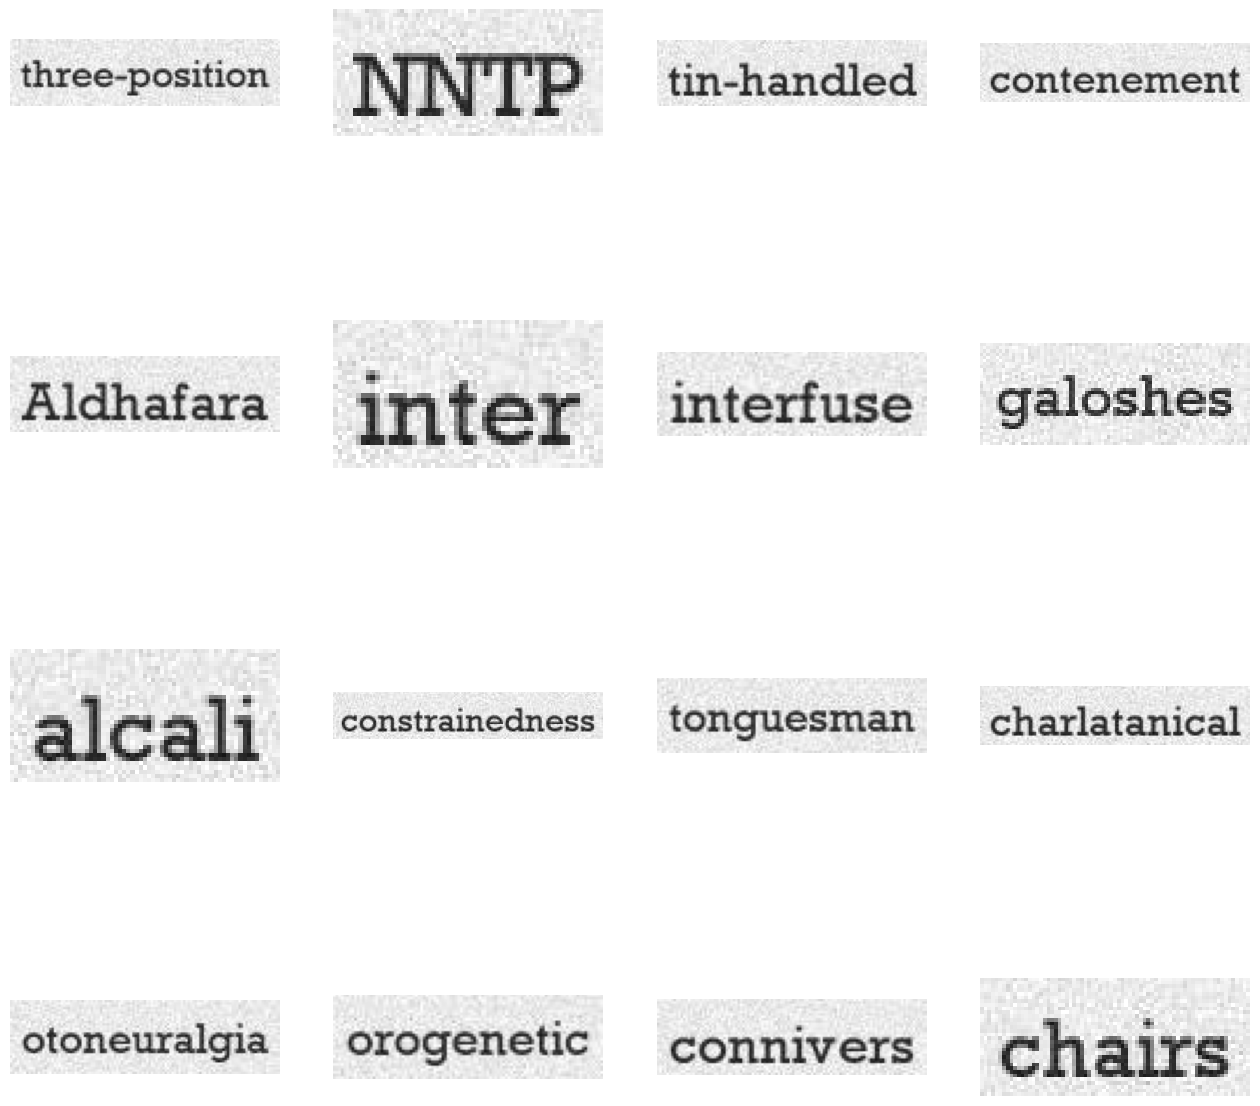

../data/raw/Font Dataset Large/Sabon


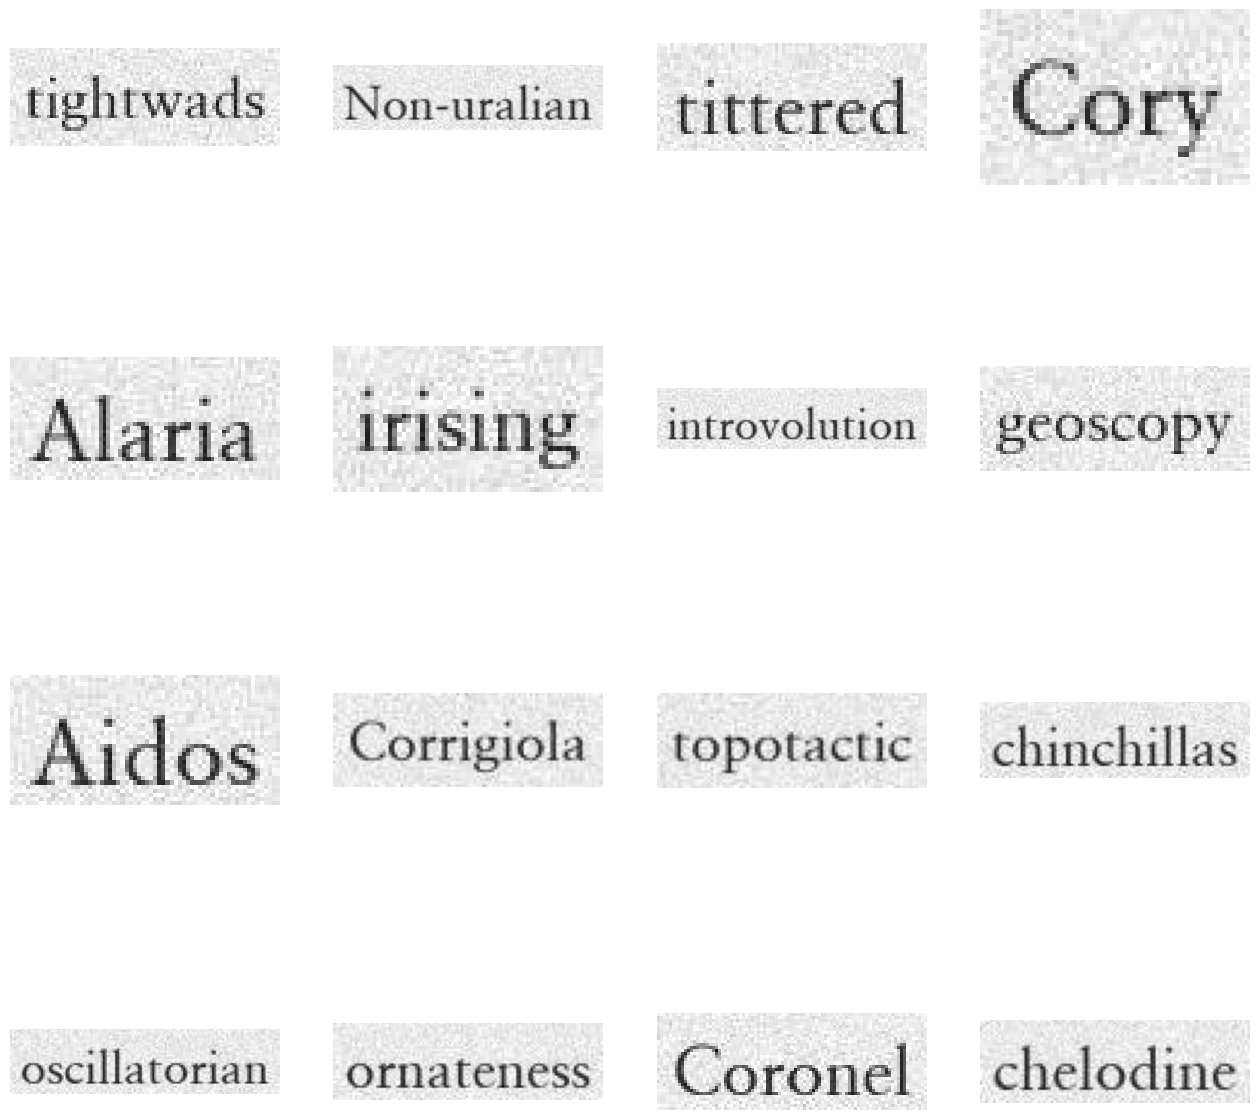

../data/raw/Font Dataset Large/Snowdrift Regular


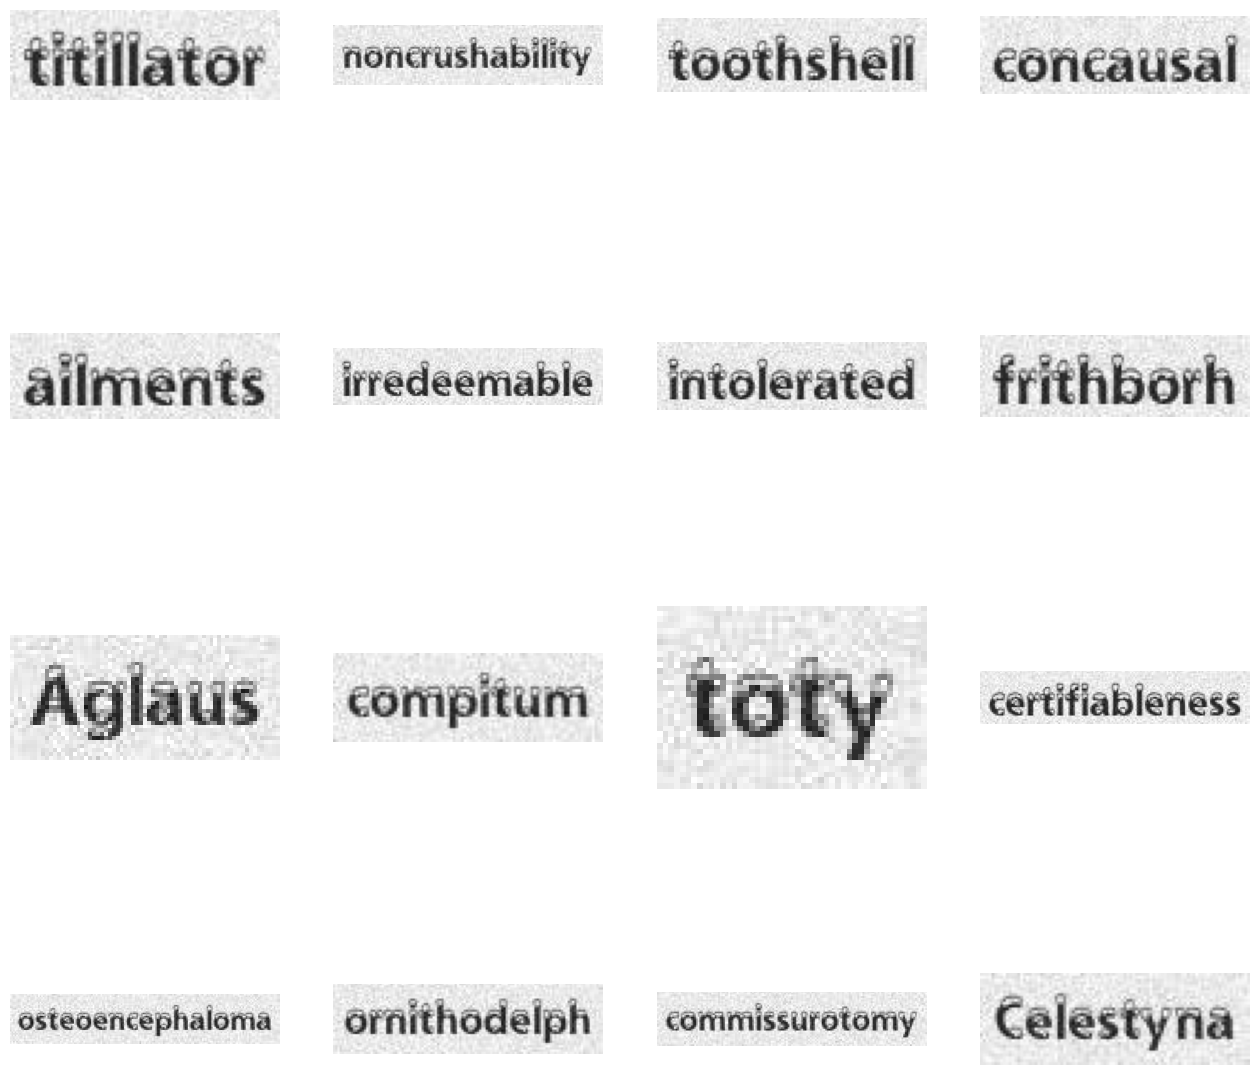

../data/raw/Font Dataset Large/Steppes TT


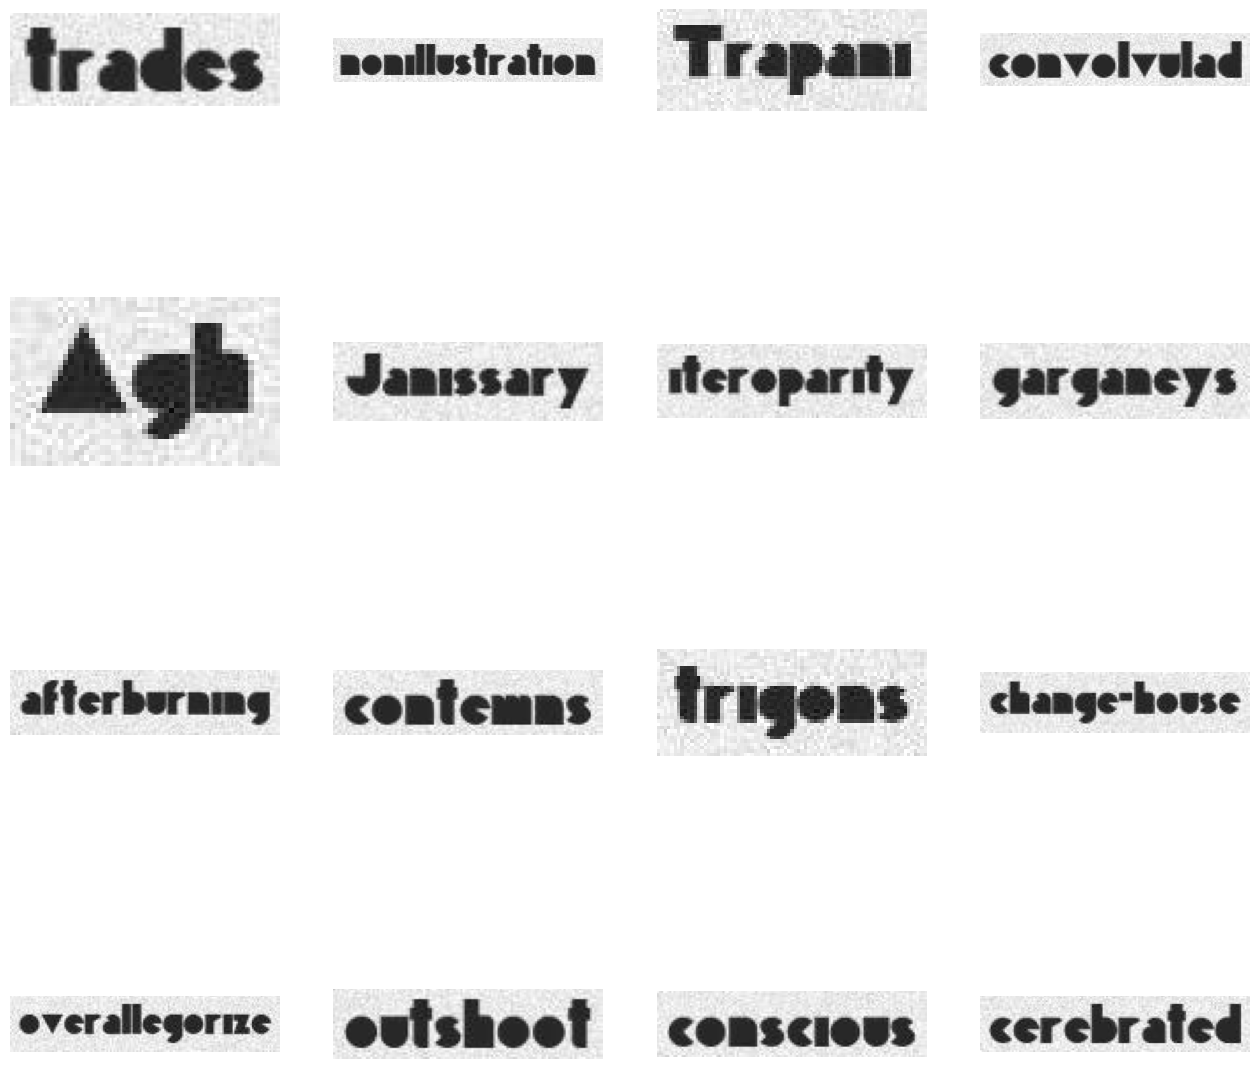

../data/raw/Font Dataset Large/Times New Roman


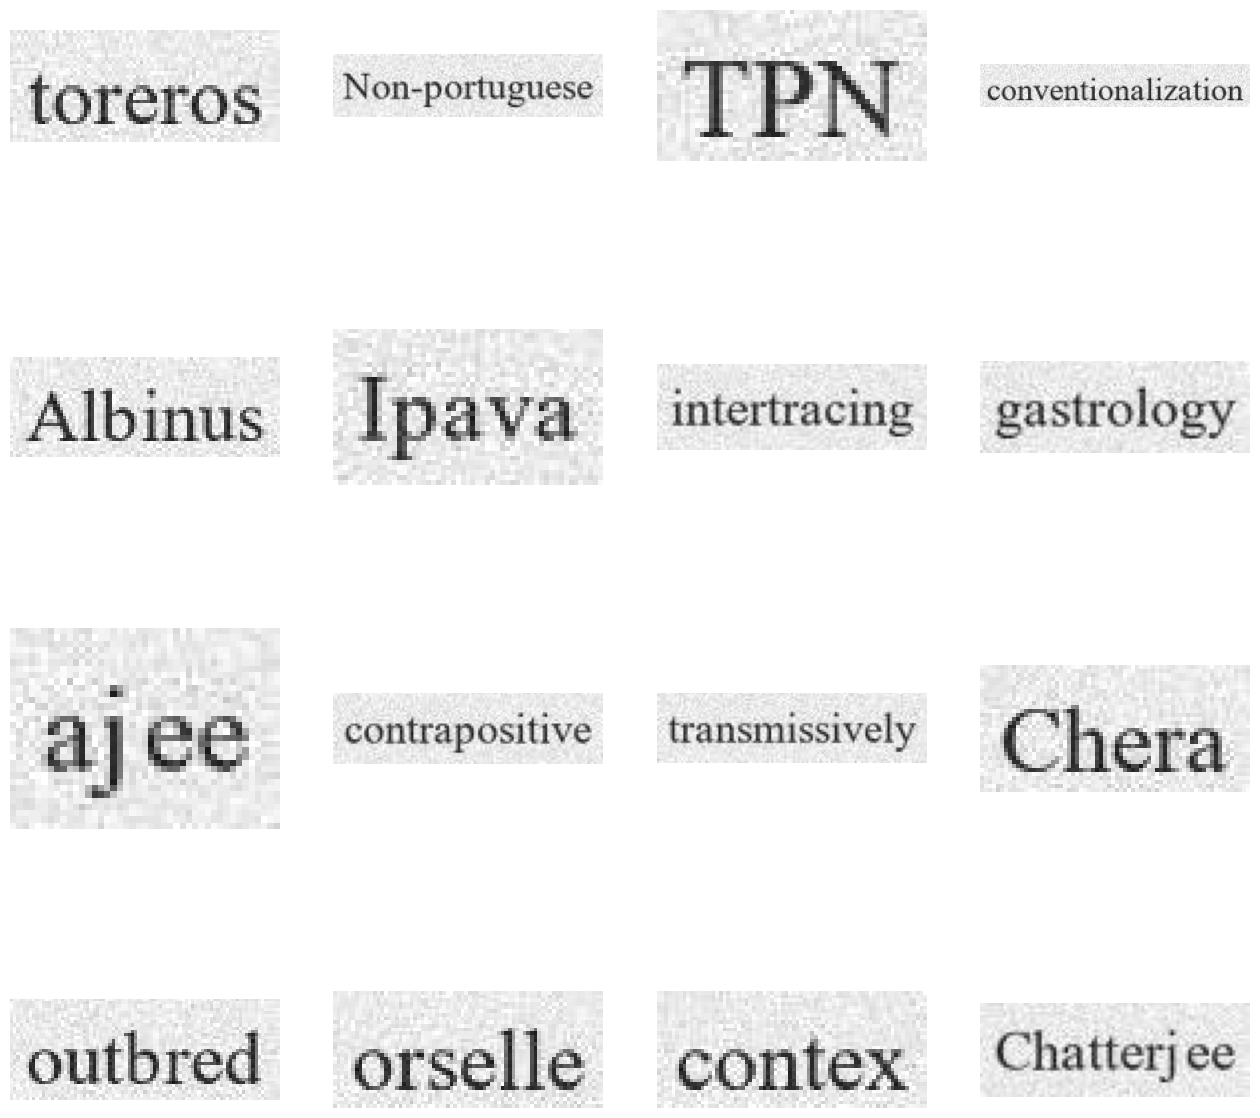

../data/raw/Font Dataset Large/Verdana


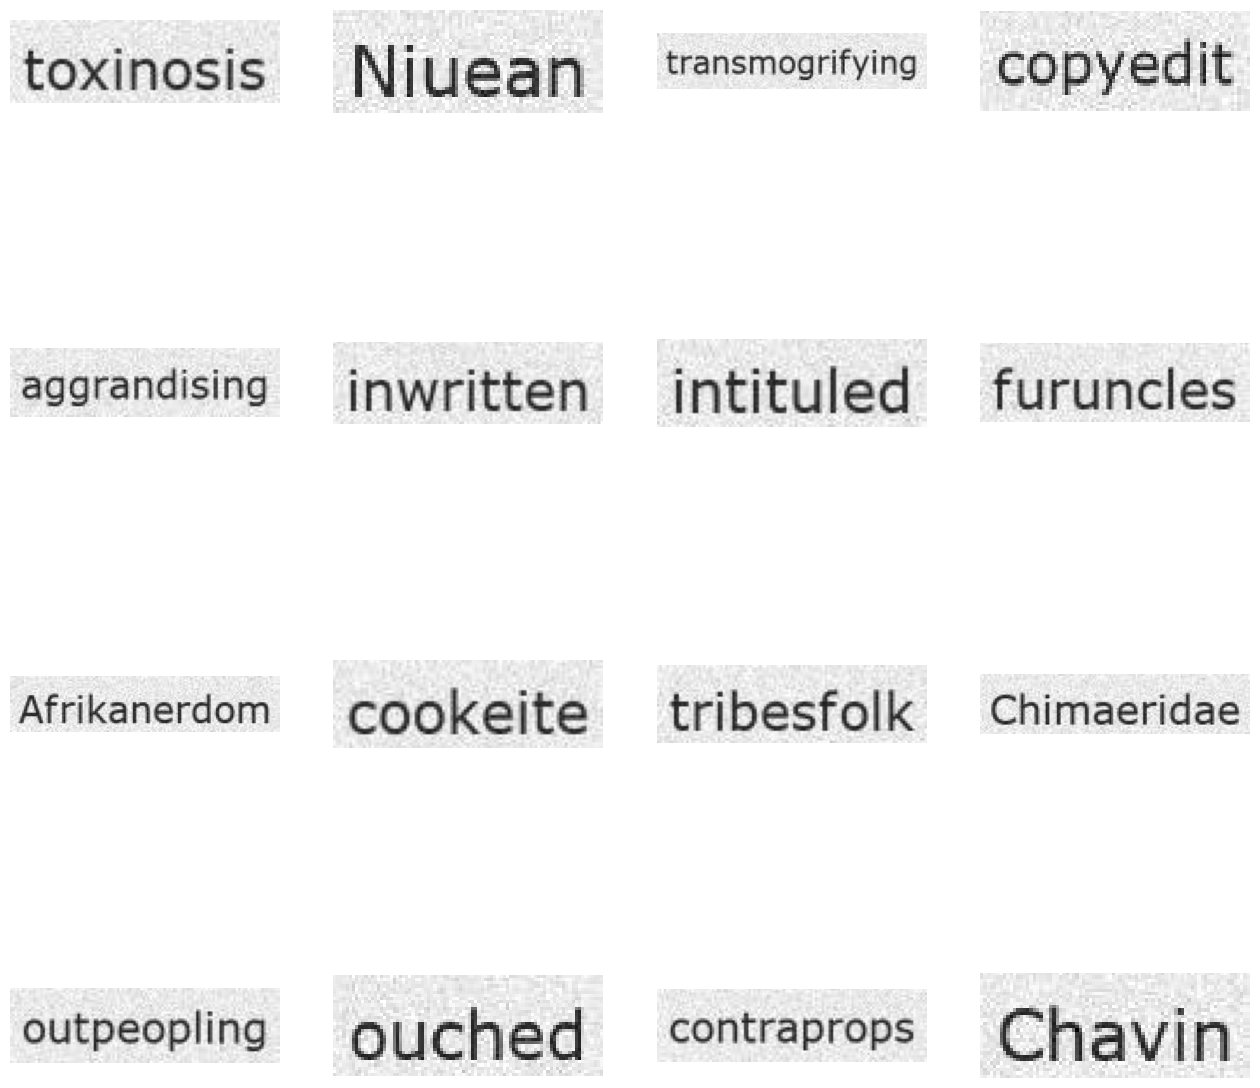

In [39]:
nrows = 4
ncols = 4
for path, count in path_counts[-6:]:
    print(str(path))
    show_image_sample(str(path), ncols, nrows)

## Final thoughts:
- I've analyzed the data
- Investigated features (width, height, different font type images, class distribution etc)